In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pickle

In [3]:
def cds_generation(year_frame):
    local_cds = []
    for i in range (1, len(year_frame)):
        try:
            county_code = str(year_frame.loc[i-1, "CountyCode"])
            district_code = str(year_frame.loc[i-1, "DistrictCode"])
            school_code = str(year_frame.loc[i-1, "SchoolCode"])
            
            school_cds = (county_code+district_code+school_code)
            local_cds.append(school_cds)

        except:
            local_cds.append(None)
    local_cds.append(None)        
    return local_cds

def cds_length(year_frame):
    local_len = []
    for i in range (1, len(year_frame)):
        try:
            local_len.append((len(year_frame.loc[i, "CDS_STRING"])))
        except:
            local_len.append(None)
    local_len.append(None)        
    return local_len

def score_clean(year_frame, column_to_clean):
    local_series = []
    for i in range (1, len(year_frame)):
        if year_frame.loc[i, column_to_clean] == '- -':
            local_series.append(0)
        elif year_frame.loc[i, column_to_clean] == '--':
            local_series.append(0)
        elif year_frame.loc[i, column_to_clean] == '    --':
            local_series.append(0)
        elif year_frame.loc[i, column_to_clean] == 'E':
            local_series.append(0)
        elif year_frame.loc[i, column_to_clean] == '   .':
            local_series.append(0)
            
        elif year_frame.loc[i, column_to_clean] == None:
            local_series.append(0)
            
        else:
            local_series.append(year_frame.loc[i, column_to_clean])
    local_series.append(0)
    return local_series

In [406]:
# def cds_generation(year_frame):
#     local_cds = []
#     for i in range (1, len(year_frame)):
#         try:
#             county_code = str(year_frame.loc[i-1, "CountyCode"])
#             district_code = str(year_frame.loc[i-1, "DistrictCode"])
#             school_code = str(year_frame.loc[i-1, "SchoolCode"])
            
# #             if type(county_code) is float:
# #                 county_code=str(int(county_code))
# #             if type(district_code) is float:
# #                 district_code=str(int(district_code))
# #             if type(charter_num) is float:
# #                 charter_num=str(int(charter_num))
# #             if type(school_code) is float:
# #                 school_code=str(int(school_code))
            
#             school_cds = (county_code+district_code+school_code)
#             local_cds.append(school_cds)

#         except:
#             local_cds.append(None)
#     local_cds.append(None)        
#     return local_cds

In [9]:
CAHSEE_df[1]['CDS'].unique()

array(['1000', '11001700', '1100170130401', ..., '993227605637780',
       '0000', None], dtype=object)

In [4]:
dropout_df = [0]

start = time.time()
print("Starting Job")

for i in range(1, 15):

    if i<10:
        year="0"+str(i)
    else:
        year=str(i)

    data = pd.read_csv('Resources/Dropouts/filesdropouts ('+str(i)+').txt', sep='\\t', engine='python')
    
    print("appending year 20"+year)
    dropout_df.append(data)
            
    dropout_df[i]['YEAR']=int(str(20)+str(year))
    
    dropout_df[i]=dropout_df[i].groupby('CDS_CODE').sum()[['D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'DUS', 'DTOT']].reset_index()

print("Job Successfully Completed!")
end = time.time()
print("Total time: " + str(round(end - start, 2)) + " seconds")  
        
dropout_df[1].head()

Starting Job
appending year 2001
appending year 2002
appending year 2003
appending year 2004
appending year 2005
appending year 2006
appending year 2007
appending year 2008
appending year 2009
appending year 2010
appending year 2011
appending year 2012
appending year 2013
appending year 2014
Job Successfully Completed!
Total time: 18.18 seconds


,CDS_CODE,D7,D8,D9,D10,D11,D12,DUS,DTOT
0,1100170130401,0,0,0,0,0,0,0,0
1,1100170130419,0,0,0,0,0,0,0,0
2,1100170130427,0,0,1,0,1,0,0,2
3,1100176106751,0,0,0,0,0,0,0,0
4,1316090131755,0,0,0,0,0,0,0,0


In [5]:
UC_Prep_df = [0]

start = time.time()
print("Starting Job")

for i in range(1, 15):

    if i<10:
        year="0"+str(i)
    else:
        year=str(i)

    data = pd.read_csv('Resources/UC_Prepared_Grads/filesgradaf.asp ('+str(i)+').txt', sep='\\t', engine='python')
    
    print("appending year 20"+year)
    UC_Prep_df.append(data)

    UC_Prep_df[i]['YEAR']=int(str(20)+str(year))

print("Job Successfully Completed!")
end = time.time()
print("Total time: " + str(round(end - start, 2)) + " seconds")  
        
UC_Prep_df[1].head()

Starting Job
appending year 2001
appending year 2002
appending year 2003
appending year 2004
appending year 2005
appending year 2006
appending year 2007
appending year 2008
appending year 2009
appending year 2010
appending year 2011
appending year 2012
appending year 2013
appending year 2014
Job Successfully Completed!
Total time: 0.68 seconds


,CDS_CODE,COUNTY,DISTRICT,SCHOOL,AM_IND,ASIAN,PAC_ISLD,FILIPINO,HISPANIC,AFRICAN_AM,WHITE,MULTIPLE,TOTAL,year,YEAR
0,1611190130229,Alameda,Alameda Unified,Alameda High,0,85,2,6,16,5,75,4,193,203,2001
1,1611190130625,Alameda,Alameda Unified,Alternatives in Action,0,0,0,0,0,0,1,1,2,203,2001
2,1611190132878,Alameda,Alameda Unified,Encinal High,0,47,2,18,16,28,23,2,136,203,2001
3,1611270130450,Alameda,Albany City Unified,Albany High,0,42,0,0,10,1,63,4,120,203,2001
4,1611430131177,Alameda,Berkeley Unified,Berkeley High,1,56,0,5,30,67,226,45,430,203,2001


In [6]:
for i in range(1, 14):
    UC_Prep_df[i].rename(columns={'MULTIPLE':'TWO_MORE_RACES'}, inplace=True)
    UC_Prep_df[i] = UC_Prep_df[i][['CDS_CODE', 'COUNTY', 'DISTRICT', 'SCHOOL', 'HISPANIC', 'AM_IND',
       'ASIAN', 'PAC_ISLD', 'FILIPINO', 'AFRICAN_AM', 'WHITE','TWO_MORE_RACES']]
#     print(UC_Prep_df[i].columns)

In [7]:
ACT_df = [0]

start = time.time()

for i in range(1, 15):

    if i<10:
        year="0"+str(i)
    else:
        year=str(i)

    data = pd.read_excel('Resources/SAT_ACT_AP/act'+year+'.xls')
    
    print("appending year 20"+year)
    ACT_df.append(data)
    
#     ACT_df[i]['YEAR']=int(str(20)+str(year))

ACT_columns_full = []
year=0

for page in ACT_df[1:14]:
    ACT_columns_local = []
    year+=1
    print("Fixing year "+str(year))
    if year < 9:
        for column in ACT_df[year].iloc[ACT_df[year].index==1].values.tolist()[0]:
            ACT_columns_local.append(column)
        page.columns=ACT_columns_local
        ACT_df[year] = ACT_df[year].drop(ACT_df[year].index[0:2])
        ACT_df[year] = ACT_df[year].reset_index(drop=True)

    elif year < 11:
        for column in ACT_df[year].iloc[ACT_df[year].index==2].values.tolist()[0]:
            ACT_columns_local.append(column)
        page.columns=ACT_columns_local
        ACT_df[year] = ACT_df[year].drop(ACT_df[year].index[0:3])
        ACT_df[year] = ACT_df[year].reset_index(drop=True)

    elif year < 14:
        for column in ACT_df[year].iloc[ACT_df[year].index==3].values.tolist()[0]:
            ACT_columns_local.append(column)
        page.columns=ACT_columns_local
        ACT_df[year] = ACT_df[year].drop(ACT_df[year].index[0:4])
        ACT_df[year] = ACT_df[year].reset_index(drop=True)

print('Cleaning Data')

for page in ACT_df[1:14]:
    page.rename(columns={'Number  w/Score >=21':'Scor21Ct',
                         'PctScr21':'Percent w/Score >=21',
                         "County\nNumber":"CountyCode",
                         "District\nNumber":"DistrictCode",
                         "School\nNumber":"SchoolCode"}, inplace=True)     
    cds = cds_generation(page)
    page['CDS_CODE']=cds
    page = page.dropna(subset=['CDS_CODE'])
    page['CDS_CODE'] = page['CDS_CODE'].astype(str)
    
print("Job Successfully Completed!")
end = time.time()
print("Total time: " + str(round(end - start, 2)) + " seconds")        

columns_to_clean = ['Percent\nTested', 'Average\nScore', 'Number\n w/Score\n>=21', 'Percent\nw/Score\n>=21']

for column in columns_to_clean:
    for page in ACT_df[1::]:
        if column in page.columns:
            cleaned_data = score_clean(page, column)
            page[column] = cleaned_data

ACT_df[1].head()

appending year 2001
appending year 2002
appending year 2003
appending year 2004
appending year 2005
appending year 2006
appending year 2007
appending year 2008
appending year 2009
appending year 2010
appending year 2011
appending year 2012
appending year 2013
appending year 2014
Fixing year 1
Fixing year 2
Fixing year 3
Fixing year 4
Fixing year 5
Fixing year 6
Fixing year 7
Fixing year 8
Fixing year 9
Fixing year 10
Fixing year 11
Fixing year 12
Fixing year 13
Cleaning Data


C:\Users\kyled\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Job Successfully Completed!
Total time: 3.63 seconds


,CountyCode,DistrictCode,SchoolCode,County Name,District Name,School Name,Grade 12 Enrollment,Number Tested,Percent Tested,Average Score,Number w/Score >=21,Percent w/Score >=21,CDS_CODE
0,01,31617,0131763,ALAMEDA,CALIF. SCHOOL FOR THE DEAF,CALIF SCHOOL FOR THE DEAF,48,1,4.5,22.8,11,2.9,01316170131763
1,01,61119,0130229,ALAMEDA,ALAMEDA CITY UNIFIED,ALAMEDA HIGH,374,17,20.4,19.3,21,7.8,01611190130229
2,01,61119,0132878,ALAMEDA,ALAMEDA CITY UNIFIED,ENCINAL HIGH,270,55,0.0,0.0,0,0.0,01611190132878
3,01,61119,0134304,ALAMEDA,ALAMEDA CITY UNIFIED,ISLAND HIGH (CONT.),108,0,18.3,24.0,31,14.9,01611190134304
4,01,61127,0130450,ALAMEDA,ALBANY CITY UNIFIED,ALBANY HIGH,208,38,17.1,23.3,87,11.6,01611270130450


In [ ]:
#vectorization

def cds_generation(year_frame):
    local_cds = []
    for i in range (1, len(year_frame)):
        county_code = str(year_frame.loc[i-1, "CountyCode"])
        district_code = str(year_frame.loc[i-1, "DistrictCode"])
        school_code = str(year_frame.loc[i-1, "SchoolCode"])

        school_cds = (county_code+district_code+school_code)
        local_cds.append(school_cds)

    local_cds.append(None)        
    return local_cds

for page in ACT_df[1:14]:     
    cds = cds_generation(page)
    page['CDS_CODE']=cds

#iterrows

for i in range(1, 14):    
    for index, row in ACT_df[i].iterrows():
        row['CDS_CODE']=row['CountyCode']+row['DistrictCode']+row['SchoolCode']

In [8]:
for i in range(1, 14):
    ACT_df[i].rename(columns={'County\nName':'County Name', 'Grade\n12':'Grade 12\nEnrollment', 
                              'Scor21Ct':'Number\n w/Score\n>=21', 'Percent w/Score >=21':'Percent\nw/Score\n>=21'
        
    }, inplace=True)
    ACT_df[i].rename(columns={'Number\nTested':'ACT_Num_Tested', 'Percent\nTested':'ACT_Perc_Tested',
                              'Average\nScore':'ACT_Avg_Score','Number\n w/Score\n>=21':'ACT_Num_w_High_Score',
                              'Percent\nw/Score\n>=21':'ACT_Perc_w_High_Score'
                              
        
    }, inplace=True)
    ACT_df[i] = ACT_df[i][['CDS_CODE','ACT_Num_Tested', 'ACT_Perc_Tested', 'ACT_Avg_Score', 'ACT_Num_w_High_Score', 
                           'ACT_Perc_w_High_Score']]
    
columns_to_clean = ['ACT_Num_Tested', 'ACT_Perc_Tested', 'ACT_Avg_Score', 'ACT_Num_w_High_Score', 
                           'ACT_Perc_w_High_Score']

for column in columns_to_clean:
    for i in range(1, 14):
        if column in ACT_df[i].columns:
            cleaned_data = score_clean(ACT_df[i], column)
            ACT_df[i][column] = cleaned_data

In [9]:
SAT_df = [0]

start = time.time()
print("Starting Job 1")
for i in range(1, 15):

    if i<10:
        year="0"+str(i)
    else:
        year=str(i)   
    print(year)
    
    data = pd.read_excel('Resources/SAT_ACT_AP/sat'+year+'.xls')
    SAT_df.append(data)
    
#     SAT_df[i]['YEAR']=int(str(20)+str(year))

print("Job 1 Successfully Completed!")
print("Starting Job 2")

SAT_columns_full = []
year=0

for page in SAT_df[1:14]:
    SAT_columns_local = []
    year+=1
    if year < 9:
        for column in SAT_df[year].iloc[SAT_df[year].index==1].values.tolist()[0]:
            SAT_columns_local.append(column)
        page.columns=SAT_columns_local
        SAT_df[year] = SAT_df[year].drop(SAT_df[year].index[0:2])
        SAT_df[year] = SAT_df[year].reset_index(drop=True)
        
    elif year == 9:
        for column in SAT_df[year].iloc[SAT_df[year].index==2].values.tolist()[0]:
            SAT_columns_local.append(column)
        page.columns=SAT_columns_local
        SAT_df[year] = SAT_df[year].drop(SAT_df[year].index[0:3])
        SAT_df[year] = SAT_df[year].reset_index(drop=True)

    elif year == 10:
        for column in SAT_df[year].iloc[SAT_df[year].index==3].values.tolist()[0]:
            SAT_columns_local.append(column)
        page.columns=SAT_columns_local
        SAT_df[year] = SAT_df[year].drop(SAT_df[year].index[0:4])
        SAT_df[year] = SAT_df[year].reset_index(drop=True)

    elif year < 14:
        for column in SAT_df[year].iloc[SAT_df[year].index==2].values.tolist()[0]:
            SAT_columns_local.append(column)
        page.columns=SAT_columns_local
        SAT_df[year] = SAT_df[year].drop(SAT_df[year].index[0:3])
        SAT_df[year] = SAT_df[year].reset_index(drop=True)
        
SAT_column_names = ['County Number', 'District Number', 'School Number', 'County Name',
       'District Name', 'School Name', 'Grade 12 Enroll ment', 'Number Tested',
       'Percent Tested', ' Critical Reading Average', ' Math Average',
       ' Writing Average', ' Total Average', 'Total >=1500 Number',
       'Total >=1500 Percent']

print("Job 2 Successfully Completed!")
print("Starting Job 3")

# for page in SAT_df[6:13]:
#     page.columns=SAT_column_names
    
for page in SAT_df[1:6]:
    page['Writing Average'] = 0
    
for page in SAT_df[1:14]:
    page.rename(columns={'Total >=1500 Number':'Total High SAT Score','Number w/Score >=1000':'Total High SAT Score',
                         'Total >=1500 Percent':'Percent High SAT Score','Percent w/Score >=1000':'Percent High SAT Score',
                         "County\nNumber":"CountyCode","District\nNumber":"DistrictCode","School\nNumber":"SchoolCode"},
               inplace=True)
    
    for column in page:
        if column[0] == ' ':
            page.rename(columns={column:column[1::]}, inplace=True)
    
    cds = cds_generation(page)
    page['CDS_CODE']=cds
    page = page.dropna(subset=['CDS_CODE'])
    page['CDS_CODE'] = page['CDS_CODE'].astype(str)
    
print("Job 2 Successfully Completed!")
end = time.time()
print("Total time: " + str(round(end - start, 2)) + " seconds")

columns_to_clean = ['Average\nVerbal\nScore','Average\nMath\nScore', 'Average\nTotal\nScore',
                    'Number\nw/Score\n>=1000', 'Percent\nw/Score\n>=1000']

for column in columns_to_clean:
    for page in SAT_df[1::]:
        if column in page.columns:
            cleaned_data = score_clean(page, column)
            page[column] = cleaned_data
SAT_df[1].head()

Starting Job 1
01
02
03
04
05
06
07
08
09
10
11
12
13
14
Job 1 Successfully Completed!
Starting Job 2
Job 2 Successfully Completed!
Starting Job 3


C:\Users\kyled\Anaconda3\lib\site-packages\ipykernel_launcher.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Job 2 Successfully Completed!
Total time: 4.73 seconds


,CountyCode,DistrictCode,SchoolCode,County Name,District Name,School Name,Grade 12 Enrollment,Number of Takers,Percent of Takers,Average Verbal Score,Average Math Score,Average Total Score,Number w/Score >=1000,Percent w/Score >=1000,Writing Average,CDS_CODE
0,01,31617,0131763,ALAMEDA,CALIF. SCHOOL FOR THE DEAF,CALIF SCHOOL FOR THE DEAF,48,8,16.7,497,542,1039,149,39.8,0,01316170131763
1,01,61119,0130229,ALAMEDA,ALAMEDA CITY UNIFIED,ALAMEDA HIGH,374,258,69,444,487,931,49,18.1,0,01611190130229
2,01,61119,0132878,ALAMEDA,ALAMEDA CITY UNIFIED,ENCINAL HIGH,270,145,53.7,0,0,0,0,0.0,0,01611190132878
3,01,61119,0134304,ALAMEDA,ALAMEDA CITY UNIFIED,ISLAND HIGH (CONT.),108,1,0.9,542,594,1136,115,55.3,0,01611190134304
4,01,61127,0130450,ALAMEDA,ALBANY CITY UNIFIED,ALBANY HIGH,208,157,75.5,553,577,1131,322,43.0,0,01611270130450


In [10]:
for i in range(1, 14):

    SAT_df[i].rename(columns={'Number\nw/Score\n>=1500':'Total High SAT Score','Total\n>=1500 Number':'Total High SAT Score',
                              'Number\nw/Score\n>=1000':'Total High SAT Score','Total\n>=1500 Percent':'Percent High SAT Score',
                              'GE1500Ct':'Total High SAT Score','Rate1500':'Percent High SAT Score',
                              'Rate\nw/Score\n>=1500':'Percent High SAT Score','Percent\nw/Score\n>=1000':'Percent High SAT Score',
                              "County\nNumber":"CountyCode","District\nNumber":"DistrictCode","School\nNumber":"SchoolCode",
                              'V_Mean':'Average\nVerbal\nScore', 'M_Mean':'Average\nMath\nScore', 
                              'W_Mean':'Writing Average', 'Tot_Mean':'Average\nTotal\nScore',
                              'Grade\n12':'Grade 12\nEnrollment', 'Number\nTested':'Number\nof\nTakers', 
                              'Percent\nTested':'Percent\nof\nTakers', 'Average\nWriting\nScore':'Writing Average',
                              '\nWriting\nAverage':'Writing Average', '\nCritical Reading\nAverage':'Average\nVerbal\nScore',
                              '\nMath\nAverage':'Average\nMath\nScore', '\nTotal\nAverage':'Average\nTotal\nScore'
                             },
                     inplace=True)
    

    SAT_df[i].rename(columns={'Number\nof\nTakers':'SAT_Num_Tested', 'Percent\nof\nTakers':'SAT_Perc_Tested',
                              'Average\nVerbal\nScore':'SAT_Verbal_Avg', 'Average\nMath\nScore':'SAT_Math_Avg',
                              'Average\nTotal\nScore':'SAT_Avg_Score', 'Total High SAT Score':'SAT_Num_w_High_Score',
                              'Percent High SAT Score':'SAT_Perc_w_High_Score', 'Writing Average':'SAT_Writing_Avg'
                             },
                     inplace=True)
    
    SAT_df[i] = SAT_df[i][['CDS_CODE','SAT_Num_Tested', 'SAT_Perc_Tested', 'SAT_Verbal_Avg','SAT_Math_Avg', 
                           'SAT_Writing_Avg','SAT_Avg_Score', 'SAT_Num_w_High_Score','SAT_Perc_w_High_Score']]
#     print(SAT_df[i].columns)
    
SAT_df[1].head()

columns_to_clean = ['SAT_Num_Tested', 'SAT_Perc_Tested', 'SAT_Verbal_Avg','SAT_Math_Avg', 
                           'SAT_Writing_Avg','SAT_Avg_Score', 'SAT_Num_w_High_Score','SAT_Perc_w_High_Score']

for column in columns_to_clean:
    for i in range(1, 14):
        if column in SAT_df[i].columns:
            cleaned_data = score_clean(SAT_df[i], column)
            SAT_df[i][column] = cleaned_data

In [11]:
AP_df = [0]

start = time.time()
print("Starting Job")

for i in range(1, 15):

    if i<10:
        year="0"+str(i)
    else:
        year=str(i)

    data = pd.read_excel('Resources/SAT_ACT_AP/ap'+year+'.xls')
    
    print("appending year 20"+year)
    AP_df.append(data)
    
#     AP_df[i]['year']=int(str(20)+str(year))

print("Job 1 Successfully Completed!")
print("Starting Job 2")

AP_columns_to_remove = ['Rate of Exams With a Score of 3 or Greater For 12th Grade Students',
                        'Rate of Exams With a Score of 3 or Greater For 11th & 12th Grade Students',
                        'Total Number of Exams Taken',
                        'Number of Exams With a Score of 3 or Greater',
                        'Year']

AP_columns_full = []
year=0

for page in AP_df[1:14]:
    AP_columns_local = []
    year+=1
    if year < 9:
        for column in AP_df[year].iloc[AP_df[year].index==1].values.tolist()[0]:
            AP_columns_local.append(column.replace('\n', ' '))
        page.columns=AP_columns_local
        AP_df[year] = AP_df[year].drop(AP_df[year].index[0:2])
        AP_df[year] = AP_df[year].reset_index(drop=True)
        
    elif year == 9:
        for column in AP_df[year].iloc[AP_df[year].index==2].values.tolist()[0]:
            AP_columns_local.append(column.replace('\n', ' '))
        page.columns=AP_columns_local
        AP_df[year] = AP_df[year].drop(AP_df[year].index[0:3])
        AP_df[year] = AP_df[year].reset_index(drop=True)

    elif year == 10:
        for column in AP_df[year].iloc[AP_df[year].index==2].values.tolist()[0]:
            AP_columns_local.append(column.replace('\n', ' '))
        page.columns=AP_columns_local
        AP_df[year] = AP_df[year].drop(AP_df[year].index[0:3])
        AP_df[year] = AP_df[year].reset_index(drop=True)

    elif year < 14:
        for column in AP_df[year].iloc[AP_df[year].index==2].values.tolist()[0]:
            AP_columns_local.append(column.replace('\n', ' '))
        page.columns=AP_columns_local
        AP_df[year] = AP_df[year].drop(AP_df[year].index[0:3])
        AP_df[year] = AP_df[year].reset_index(drop=True)
        
for page in AP_df[1:14]:
    for item in AP_columns_to_remove:
        if item in page.columns:
            page.drop(item, axis=1, inplace=True)
    
for i in range(1, 14):
    AP_df[i].rename(columns={"County Number":"CountyCode","District Number":"DistrictCode","School Number":"SchoolCode"},
                      inplace=True) 
    cds = cds_generation(AP_df[i])
    AP_df[i]['CDS_CODE']=cds
#     AP_df[i] = AP_df[i].dropna(subset=['CDS_CODE'])
    AP_df[i]['CDS_CODE'] = AP_df[i]['CDS_CODE'].astype(str)
   
    
print("Job 2 Successfully Completed!")
end = time.time()
print("Total time: " + str(round(end - start, 2)) + " seconds")

AP_df[1].head()

Starting Job
appending year 2001
appending year 2002
appending year 2003
appending year 2004
appending year 2005
appending year 2006
appending year 2007
appending year 2008
appending year 2009
appending year 2010
appending year 2011
appending year 2012
appending year 2013
appending year 2014
Job 1 Successfully Completed!
Starting Job 2
Job 2 Successfully Completed!
Total time: 4.6 seconds


,CountyCode,DistrictCode,SchoolCode,County Name,District Name,School Name,Grade 11 Enrollment (October 2000 CBEDS),Grade 12 Enrollment (October 2000 CBEDS),Grade 11+12 Enrollment (October 2000 CBEDS),Number of AP Exam Takers,Number of Exams With a Score of 1,Number of Exams With a Score of 2,Number of Exams With a Score of 3,Number of Exams With a Score of 4,Number of Exams With a Score of 5,CDS_CODE
0,01,10017,0130401,Alameda,Alameda Co. Office of Education,Juvenile Hall/Court,115,168,283,0,0,0,0,0,0,01100170130401
1,01,10017,0130419,Alameda,Alameda Co. Office of Education,County Community,17,25,42,0,0,0,0,0,0,01100170130419
2,01,10017,0130427,Alameda,Alameda Co. Office of Education,Alternative/Opportunity,39,28,67,0,0,0,0,0,0,01100170130427
3,01,31609,0131755,Alameda,Calif. School for the Blind,Calif School for the Blind,1,2,3,0,0,0,0,0,0,01316090131755
4,01,31617,0131763,Alameda,Calif. School for the Deaf,Calif School for the Deaf,55,48,103,0,0,0,0,0,0,01316170131763


In [12]:
for i in range(1, 14):
    AP_df[i]=AP_df[i][['CDS_CODE','Number of AP Exam Takers', 'Number of Exams With a Score of 1',
       'Number of Exams With a Score of 2',
       'Number of Exams With a Score of 3',
       'Number of Exams With a Score of 4',
       'Number of Exams With a Score of 5']]
#     print(AP_df[i].columns)

columns_to_clean = ['Number of AP Exam Takers', 'Number of Exams With a Score of 1',
       'Number of Exams With a Score of 2',
       'Number of Exams With a Score of 3',
       'Number of Exams With a Score of 4',
       'Number of Exams With a Score of 5']

for column in columns_to_clean:
    for i in range(1, 14):
        if column in AP_df[i].columns:
            cleaned_data = score_clean(AP_df[i], column)
            AP_df[i][column] = cleaned_data


C:\Users\kyled\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [13]:
Graduate_df = [0]

start = time.time()
print("Starting Job")

for i in range(1, 15):

    if i<10:
        year="0"+str(i)
    else:
        year=str(i)

    data = pd.read_csv('Resources/Graduates/filesgrads ('+str(i)+').txt', sep='\\t', engine='python')
    
    print("appending year 20"+year)
    Graduate_df.append(data)
    
    Graduate_df[i]=Graduate_df[i].groupby('CDS_CODE').sum().reset_index()[['CDS_CODE', 'GRADS', 'UC_GRADS']]

#     Graduate_df[i]['year']=int(str(20)+str(year))

print("Job Successfully Completed!")
end = time.time()
print("Total time: " + str(round(end - start, 2)) + " seconds")

Graduate_df[1].head()

Starting Job
appending year 2001
appending year 2002
appending year 2003
appending year 2004
appending year 2005
appending year 2006
appending year 2007
appending year 2008
appending year 2009
appending year 2010
appending year 2011
appending year 2012
appending year 2013
appending year 2014
Job Successfully Completed!
Total time: 11.04 seconds


,CDS_CODE,GRADS,UC_GRADS
0,1100170130401,13,0
1,1100170130419,0,0
2,1100170130427,5,0
3,1100176106751,0,0
4,1316090131755,3,0


In [14]:
enrollment_df = [0]

start = time.time()
print("Starting Job")

for i in range(1, 15):

    if i<10:
        year="0"+str(i)
    else:
        year=str(i)

    data = pd.read_csv('Resources/Enrollment/filesenr.asp ('+str(i)+').txt', sep='\\t', engine='python')
    
    print("appending year 20"+year)
    enrollment_df.append(data)
            
    enrollment_df[i]['YEAR']=int(str(20)+str(year))
    
    enrollment_df[i]=enrollment_df[i].groupby('CDS_CODE').sum().reset_index()[['CDS_CODE', 'KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5',
                                                           'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'GR_9', 'GR_10', 'GR_11',
                                                           'GR_12', 'UNGR_SEC', 'ENR_TOTAL', 'ADULT', 'YEAR']]

print("Job Successfully Completed!")
end = time.time()
print("Total time: " + str(round(end - start, 2)) + " seconds")  
        
enrollment_df[1].head()

Starting Job
appending year 2001
appending year 2002
appending year 2003
appending year 2004
appending year 2005
appending year 2006
appending year 2007
appending year 2008
appending year 2009
appending year 2010
appending year 2011
appending year 2012
appending year 2013
appending year 2014
Job Successfully Completed!
Total time: 72.79 seconds


,CDS_CODE,KDGN,GR_1,GR_2,GR_3,GR_4,GR_5,GR_6,GR_7,GR_8,UNGR_ELM,GR_9,GR_10,GR_11,GR_12,UNGR_SEC,ENR_TOTAL,ADULT,YEAR
0,1100170130401,0,0,0,0,0,0,0,2,12,0,50,85,113,190,0,452,0,28014
1,1100170130419,0,0,0,0,0,0,0,2,7,0,20,11,11,4,0,55,0,18009
2,1100170130427,0,0,0,0,0,0,0,0,0,0,4,13,40,77,0,134,0,16008
3,1100176106751,0,0,0,0,0,0,0,1,0,0,5,9,19,26,0,60,0,12006
4,1316090131755,0,0,0,0,0,0,0,0,0,42,0,0,0,0,49,91,0,24012


In [671]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

%matplotlib inline
sns.heatmap(CAHSEE_df[1].head(50000).isnull(), cbar=False)

NameError: name 'CAHSEE_df' is not defined

In [80]:
#making CAHSEE_df grouped and workable
CAHSEE_grouped = [0]

for i in range (1, len(CAHSEE_df)):
    CAHSEE_grouped.append(CAHSEE_df[i].groupby('CDS_CODE').mean().reset_index())
    CAHSEE_grouped[i]['CDS_STRING'] = CAHSEE_grouped[i]['CDS_CODE'].astype(str)
    CAHSEE_grouped[i]['CDS_LENGTH'] = cds_length(CAHSEE_grouped[i])
    
CAHSEE_grouped[1].head()

,CDS_CODE,DistrictCode,CharterNumber,SchoolCode,RecordType,SummaryType,ENumTested,ENumPassed,EPctPassed,ENumNPassed,...,EMeanSS,EPctWACorr,EPctRCCorr,EPctLACorr,EPctWSCorr,EPctWCCorr,EEssay1WA,EEssay2WA,CDS_STRING,CDS_LENGTH
0,0,384.238095,0.0,67116.428571,4.035714,14.500000,61655.476190,40399.536585,53.134146,22759.682927,...,353.609756,61.111111,58.055556,59.907407,53.870370,55.962963,2.287037,2.168519,0,4.0
1,1000,0.000000,0.0,0.000000,5.000000,14.337349,2244.867470,2142.086207,60.258621,1069.396552,...,359.103448,65.151515,61.212121,62.454545,54.848485,60.030303,2.390909,2.324242,1000,4.0
2,2000,1341.089286,0.0,2331.839286,5.035714,14.500000,1.214286,0.000000,0.000000,12.000000,...,250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2000,4.0
3,3000,1095.232143,0.0,4108.071429,5.035714,14.500000,23.500000,52.444444,72.111111,17.333333,...,371.666667,77.777778,71.777778,71.777778,59.222222,69.222222,2.588889,2.422222,3000,4.0
4,4000,1321.089286,0.0,5977.767857,5.035714,14.500000,542.839286,466.666667,59.111111,208.466667,...,358.822222,71.227273,64.954545,64.136364,54.954545,60.181818,2.381818,2.250000,4000,4.0


In [15]:
merged_df = [0]

for i in range(1, 13):
    
    UC_Prep_df[i]['CDS_CODE'] = UC_Prep_df[i]['CDS_CODE'].astype(str)
    enrollment_df[i]['CDS_CODE'] = enrollment_df[i]['CDS_CODE'].astype(str)
    SAT_df[i]['CDS_CODE'] = SAT_df[i]['CDS_CODE'].astype(str)
    ACT_df[i]['CDS_CODE'] = ACT_df[i]['CDS_CODE'].astype(str)
    Graduate_df[i]['CDS_CODE'] = Graduate_df[i]['CDS_CODE'].astype(str)
    dropout_df[i]['CDS_CODE'] = dropout_df[i]['CDS_CODE'].astype(str)
    merged = UC_Prep_df[i].merge(enrollment_df[i], suffixes=['_prep','_enroll'], on='CDS_CODE', how='inner')\
    .merge(Graduate_df[i], on="CDS_CODE", how='inner')\
    .merge(dropout_df[i], on='CDS_CODE', how='inner')\
    .merge(SAT_df[i], on='CDS_CODE', how='inner')\
    .merge(ACT_df[i], on='CDS_CODE', how='inner')\
    .merge(AP_df[i], on='CDS_CODE', how='inner')
    
    merged_df.append(merged)
    
merged_df[1]

,CDS_CODE,COUNTY,DISTRICT,SCHOOL,HISPANIC,AM_IND,ASIAN,PAC_ISLD,FILIPINO,AFRICAN_AM,...,ACT_Perc_Tested,ACT_Avg_Score,ACT_Num_w_High_Score,ACT_Perc_w_High_Score,Number of AP Exam Takers,Number of Exams With a Score of 1,Number of Exams With a Score of 2,Number of Exams With a Score of 3,Number of Exams With a Score of 4,Number of Exams With a Score of 5
0,10621171030196,Fresno,Clovis Unified,Clovis West High,38,5,60,3,9,5,...,16.4,23.4,73,11.8,0,0,0,0,0,0
1,10621171030469,Fresno,Clovis Unified,Enterprise Alternative,0,0,0,0,0,0,...,0.0,0.0,0,0.0,220,17,97,118,108,62
2,10621171030501,Fresno,Clovis Unified,Buchanan High,26,6,34,1,2,3,...,9.6,19.6,28,3.9,0,0,0,0,0,0
3,10621171031004,Fresno,Clovis Unified,Gateway High (Continuation),0,0,0,0,0,0,...,2.3,0.0,0,0.0,208,49,77,91,89,32
4,10621171031053,Fresno,Clovis Unified,Clovis High,33,6,38,3,4,4,...,7.9,0.0,0,0.0,0,0,0,0,0,0
5,10621251031376,Fresno,Coalinga-Huron Unified,Coalinga High,14,0,3,2,0,0,...,0.0,0.0,0,0.0,0,0,0,0,0,0
6,10621581032150,Fresno,Fowler Unified,Fowler High,18,0,10,0,0,0,...,24.7,22.4,88,14.9,0,0,0,0,0,0
7,10621661030279,Fresno,Fresno Unified,Bullard High,24,1,27,0,3,12,...,11.9,16.7,2,1.0,0,0,0,0,0,0
8,10621661030295,Fresno,Fresno Unified,Erma Duncan Polytechnical High,5,0,22,0,0,1,...,6.8,17.4,7,1.4,0,0,0,0,0,0
9,10621661031897,Fresno,Fresno Unified,Edison High,35,0,62,1,2,17,...,10.5,18.7,14,3.4,83,45,54,15,10,13


In [19]:
merged_concat_df = pd.DataFrame()
for i in range(1, 11):
    merged_concat_df = pd.concat([merged_concat_df, merged_df[i]])
    
merged_concat_df = merged_concat_df[['CDS_CODE', 'COUNTY', 'DISTRICT','SCHOOL', 
    'AFRICAN_AM', 'AM_IND', 'ASIAN', 'FILIPINO', 'PAC_ISLD', 'HISPANIC', 'WHITE', 'TWO_MORE_RACES', 
    'KDGN','GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'GR_9', 'GR_10', 'GR_11', 'GR_12','ADULT', 
    'ENR_TOTAL', 'GRADS', 'UC_GRADS', 'UNGR_ELM', 'UNGR_SEC', 
    'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'DTOT', 'DUS', 
    'ACT_Avg_Score', 'ACT_Num_Tested', 'ACT_Num_w_High_Score','ACT_Perc_Tested', 'ACT_Perc_w_High_Score', 
    'SAT_Avg_Score','SAT_Math_Avg', 'SAT_Num_Tested', 'SAT_Num_w_High_Score','SAT_Perc_Tested', 
    'SAT_Perc_w_High_Score', 'SAT_Verbal_Avg','SAT_Writing_Avg',
    'Number of AP Exam Takers', 'Number of Exams With a Score of 1','Number of Exams With a Score of 2',
    'Number of Exams With a Score of 3','Number of Exams With a Score of 4','Number of Exams With a Score of 5']]

merged_concat_df

C:\Users\kyled\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,CDS_CODE,COUNTY,DISTRICT,SCHOOL,AFRICAN_AM,AM_IND,ASIAN,FILIPINO,PAC_ISLD,HISPANIC,...,SAT_Perc_Tested,SAT_Perc_w_High_Score,SAT_Verbal_Avg,SAT_Writing_Avg,Number of AP Exam Takers,Number of Exams With a Score of 1,Number of Exams With a Score of 2,Number of Exams With a Score of 3,Number of Exams With a Score of 4,Number of Exams With a Score of 5
0,10621171030196,Fresno,Clovis Unified,Clovis West High,5,5,60,9,3,38,...,2.5,24.8,518,0,0,0,0,0,0,0
1,10621171030469,Fresno,Clovis Unified,Enterprise Alternative,0,0,0,0,0,0,...,44.6,0,0,0,220,17,97,118,108,62
2,10621171030501,Fresno,Clovis Unified,Buchanan High,3,6,34,2,1,26,...,1.2,25.3,498,0,0,0,0,0,0,0
3,10621171031004,Fresno,Clovis Unified,Gateway High (Continuation),0,0,0,0,0,0,...,42.4,8.1,501,0,208,49,77,91,89,32
4,10621171031053,Fresno,Clovis Unified,Clovis High,4,6,38,4,3,33,...,18,7.9,439,0,0,0,0,0,0,0
5,10621251031376,Fresno,Coalinga-Huron Unified,Coalinga High,0,0,3,0,2,14,...,30.7,0,0,0,0,0,0,0,0,0
6,10621581032150,Fresno,Fowler Unified,Fowler High,0,0,10,0,0,18,...,5.3,33.3,510,0,0,0,0,0,0,0
7,10621661030279,Fresno,Fresno Unified,Bullard High,12,1,27,3,0,24,...,4.8,2.5,412,0,0,0,0,0,0,0
8,10621661030295,Fresno,Fresno Unified,Erma Duncan Polytechnical High,1,0,22,0,0,5,...,56.5,4.7,413,0,0,0,0,0,0,0
9,10621661031897,Fresno,Fresno Unified,Edison High,17,0,62,2,1,35,...,24.5,12.7,433,0,83,45,54,15,10,13


In [20]:
merged_concat_df.columns

Index(['CDS_CODE', 'COUNTY', 'DISTRICT', 'SCHOOL', 'AFRICAN_AM', 'AM_IND',
       'ASIAN', 'FILIPINO', 'PAC_ISLD', 'HISPANIC', 'WHITE', 'TWO_MORE_RACES',
       'KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8',
       'GR_9', 'GR_10', 'GR_11', 'GR_12', 'ADULT', 'ENR_TOTAL', 'GRADS',
       'UC_GRADS', 'UNGR_ELM', 'UNGR_SEC', 'D7', 'D8', 'D9', 'D10', 'D11',
       'D12', 'DTOT', 'DUS', 'ACT_Avg_Score', 'ACT_Num_Tested',
       'ACT_Num_w_High_Score', 'ACT_Perc_Tested', 'ACT_Perc_w_High_Score',
       'SAT_Avg_Score', 'SAT_Math_Avg', 'SAT_Num_Tested',
       'SAT_Num_w_High_Score', 'SAT_Perc_Tested', 'SAT_Perc_w_High_Score',
       'SAT_Verbal_Avg', 'SAT_Writing_Avg', 'Number of AP Exam Takers',
       'Number of Exams With a Score of 1',
       'Number of Exams With a Score of 2',
       'Number of Exams With a Score of 3',
       'Number of Exams With a Score of 4',
       'Number of Exams With a Score of 5'],
      dtype='object')

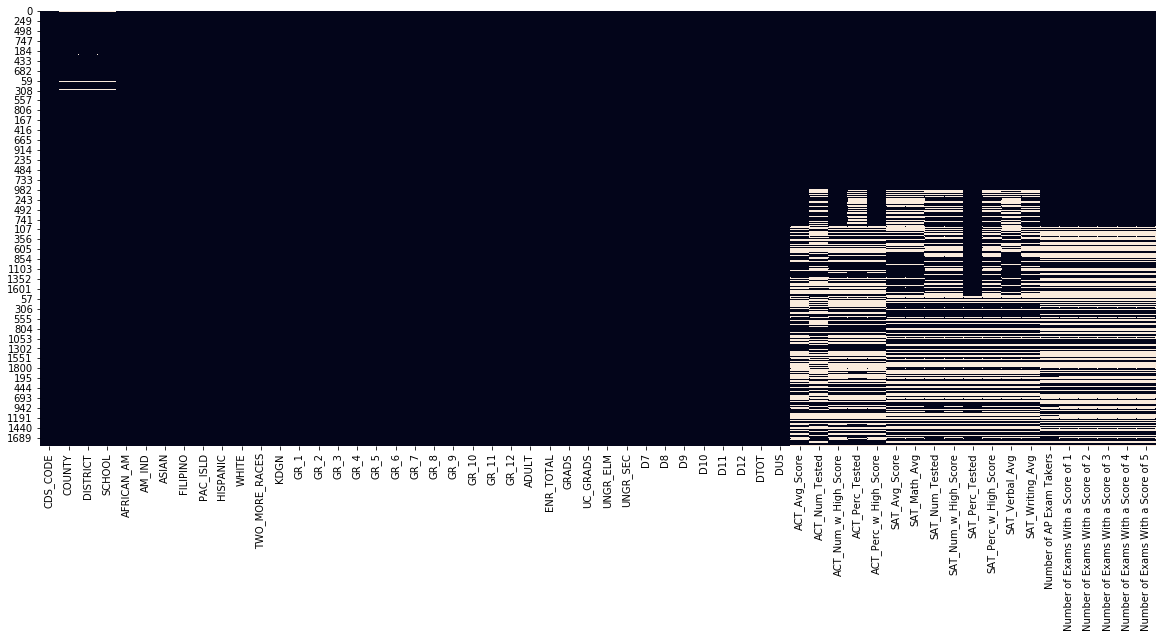

In [21]:
%matplotlib inline
plt.figure(figsize=(20, 8))
sns.heatmap(merged_concat_df.head(30000).isnull(), cbar=False)

In [22]:
len(merged_concat_df)

10915

In [881]:
# merged_concat_df.dropna(inplace=True)
# len(merged_concat_df)

6832

In [1009]:
prediction_values = merged_concat_df[['CDS_CODE', 'COUNTY', 'DISTRICT','SCHOOL', 
    'AFRICAN_AM', 'AM_IND', 'ASIAN', 'FILIPINO', 'PAC_ISLD', 'HISPANIC', 'WHITE', 'TWO_MORE_RACES', 
    'KDGN','GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'GR_9', 'GR_10', 'GR_11', 'GR_12','ADULT', 
    'ENR_TOTAL', 'GRADS', 'UNGR_ELM', 'UNGR_SEC', 
    'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'DTOT', 'DUS', 
    'ACT_Avg_Score', 'ACT_Num_Tested', 'ACT_Num_w_High_Score','ACT_Perc_Tested', 'ACT_Perc_w_High_Score', 
    'SAT_Avg_Score','SAT_Math_Avg', 'SAT_Num_Tested', 'SAT_Num_w_High_Score','SAT_Perc_Tested', 
    'SAT_Perc_w_High_Score', 'SAT_Verbal_Avg','SAT_Writing_Avg',
    'Number of AP Exam Takers', 'Number of Exams With a Score of 1','Number of Exams With a Score of 2',
    'Number of Exams With a Score of 3','Number of Exams With a Score of 4','Number of Exams With a Score of 5']]

In [29]:
merged_concat_df.fillna(0, inplace=True)

In [30]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split

X = merged_concat_df[['AFRICAN_AM', 'AM_IND', 'ASIAN', 'FILIPINO', 'PAC_ISLD', 'HISPANIC', 'WHITE', 'TWO_MORE_RACES', 
    'KDGN','GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'GR_9', 'GR_10', 'GR_11', 'GR_12','ADULT', 
    'ENR_TOTAL', 'GRADS', 'UNGR_ELM', 'UNGR_SEC', 
    'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'DTOT', 'DUS', 
    'ACT_Avg_Score', 'ACT_Num_Tested', 'ACT_Num_w_High_Score','ACT_Perc_Tested', 'ACT_Perc_w_High_Score', 
    'SAT_Avg_Score','SAT_Math_Avg', 'SAT_Num_Tested', 'SAT_Num_w_High_Score','SAT_Perc_Tested', 
    'SAT_Perc_w_High_Score', 'SAT_Verbal_Avg','SAT_Writing_Avg',
    'Number of AP Exam Takers', 'Number of Exams With a Score of 1','Number of Exams With a Score of 2',
    'Number of Exams With a Score of 3','Number of Exams With a Score of 4','Number of Exams With a Score of 5']]

y = merged_concat_df['UC_GRADS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=37)
X_test, X_val, y_test, y_val = train_test_split(X, y, test_size=0.5, random_state=37)

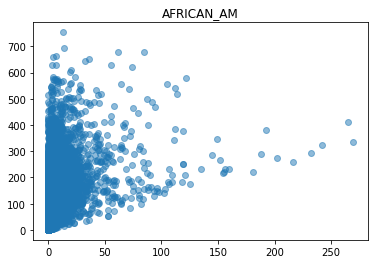

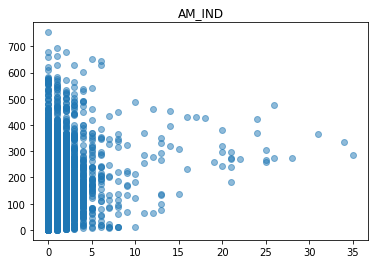

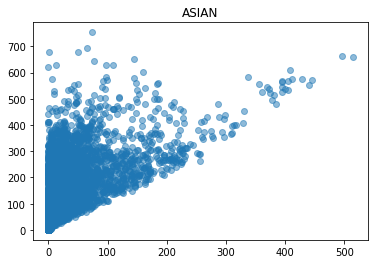

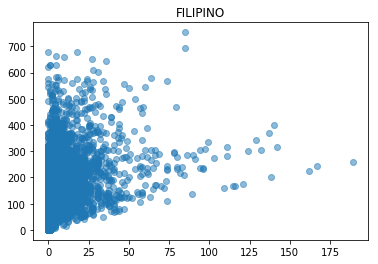

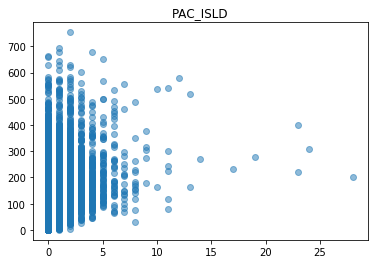

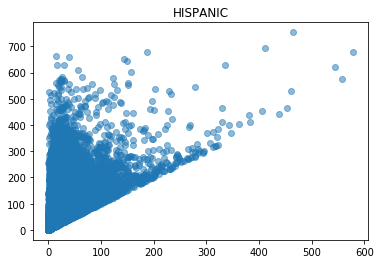

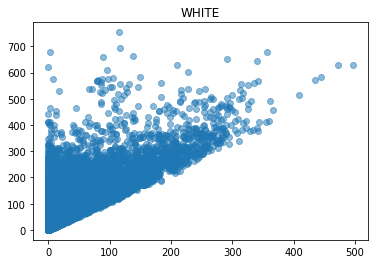

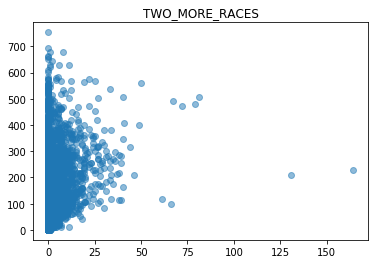

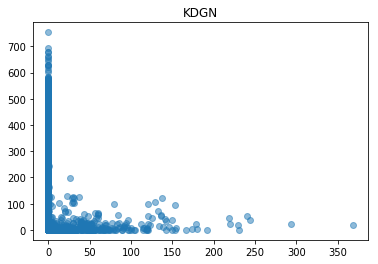

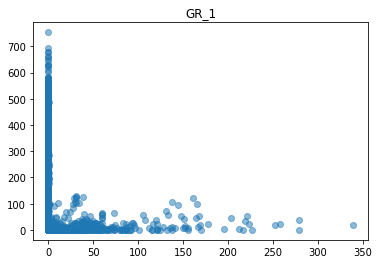

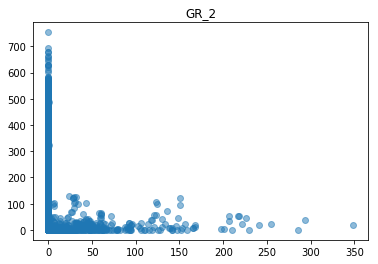

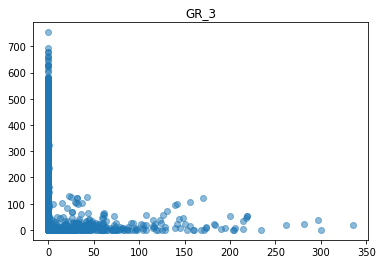

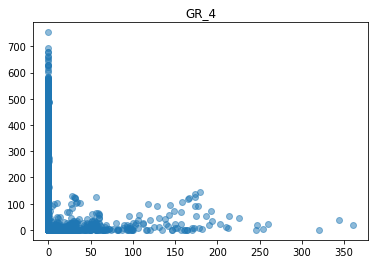

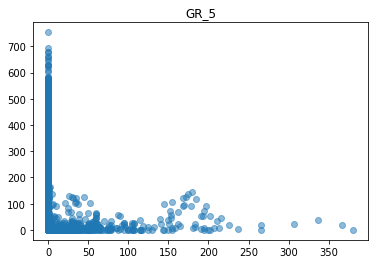

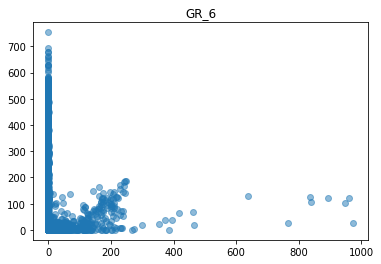

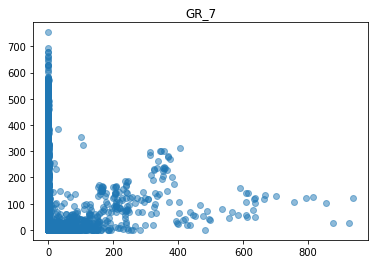

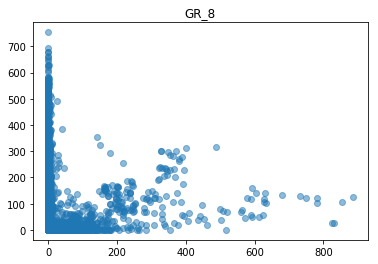

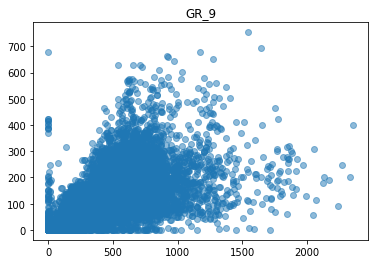

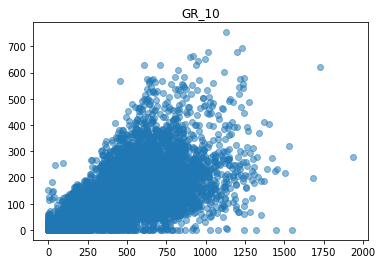

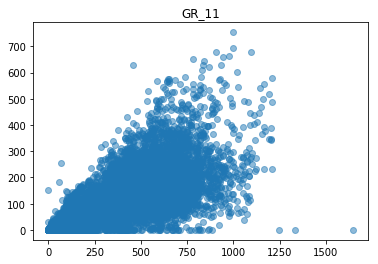

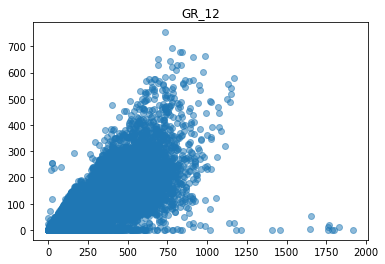

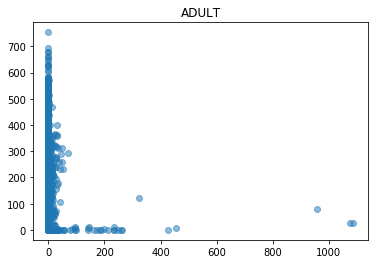

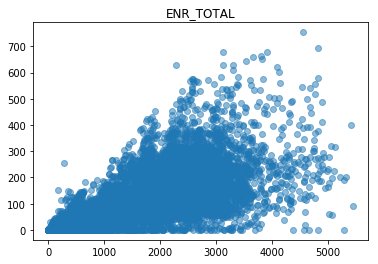

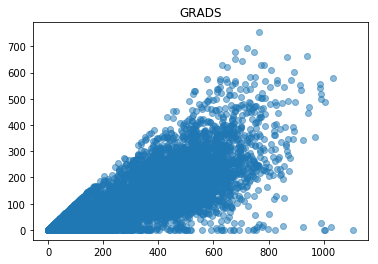

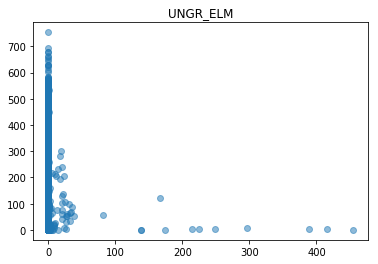

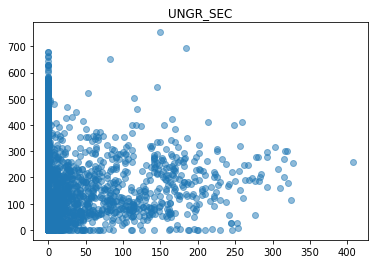

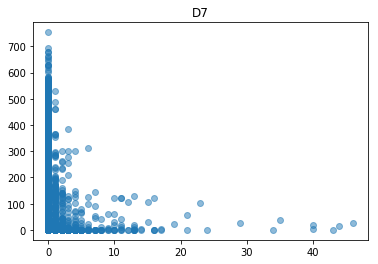

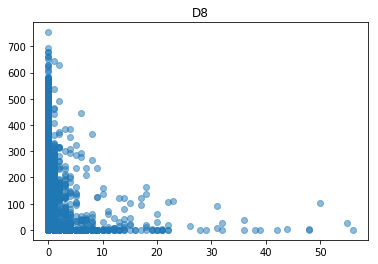

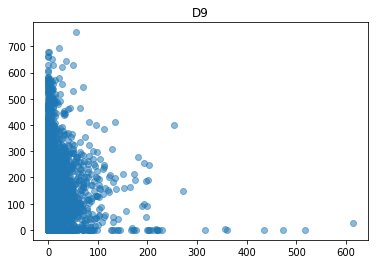

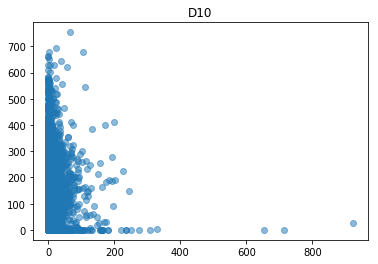

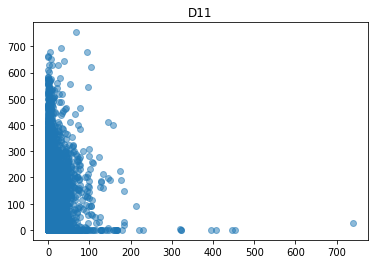

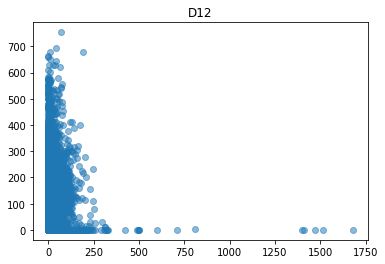

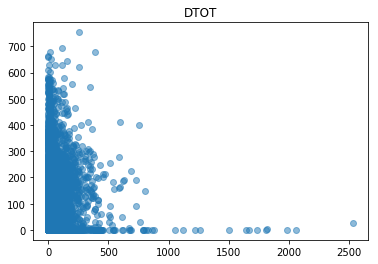

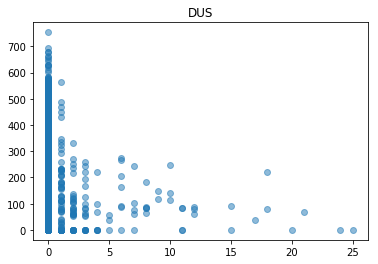

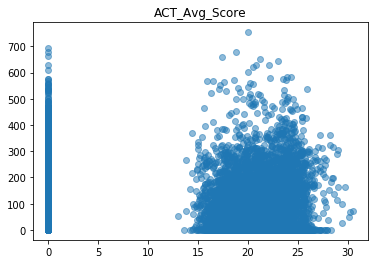

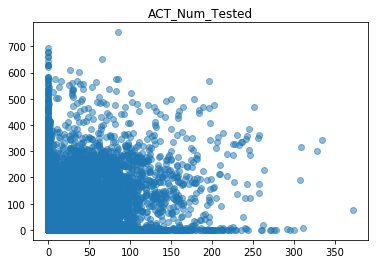

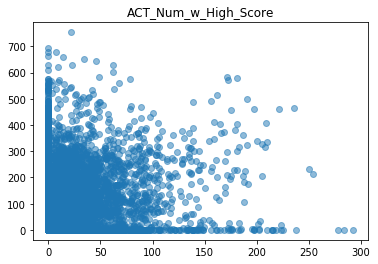

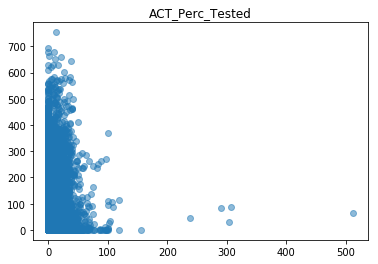

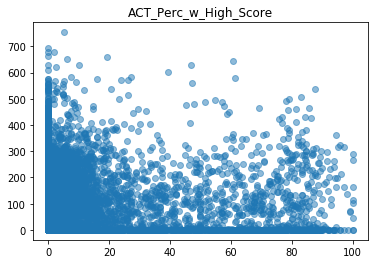

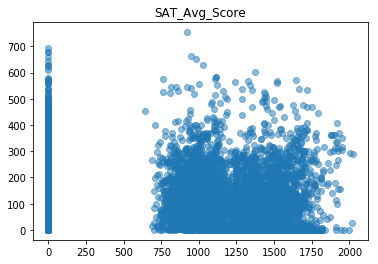

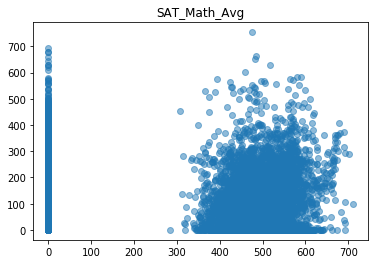

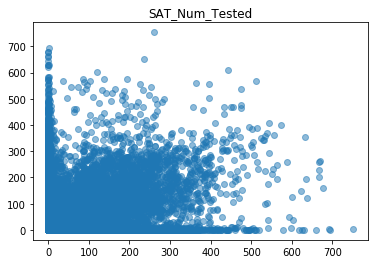

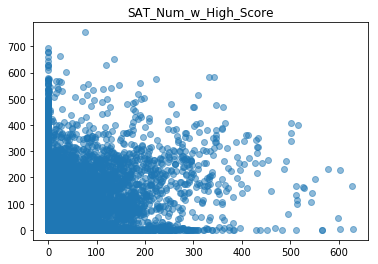

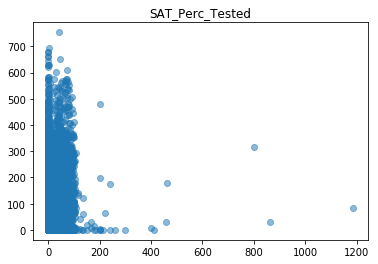

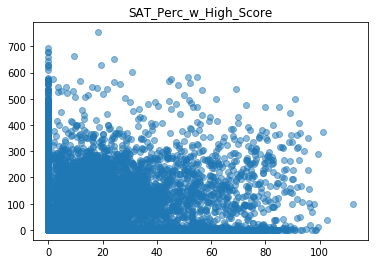

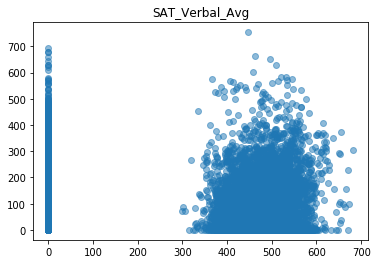

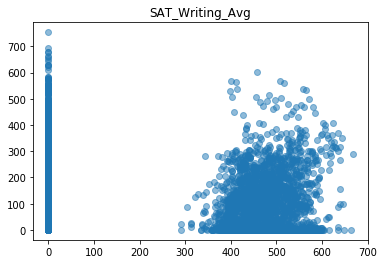

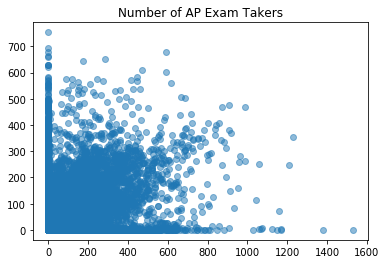

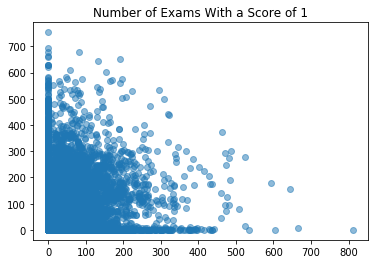

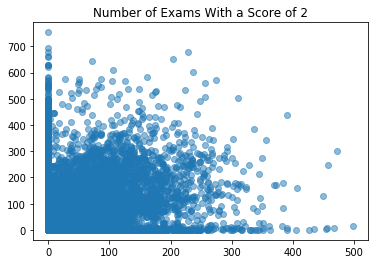

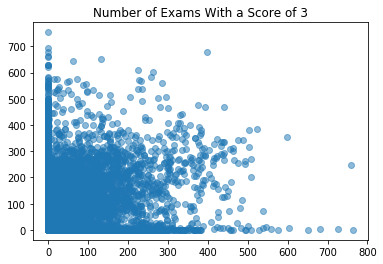

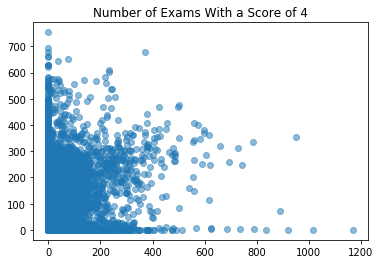

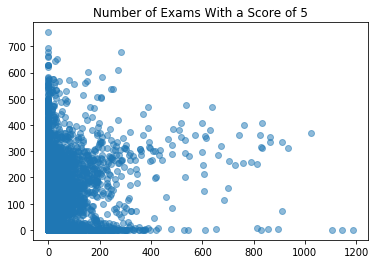

In [31]:
for feature in X.columns:
    plt.scatter(X[feature], y, alpha=.5)
    plt.title(feature)
    plt.show()

In [633]:
edited_merged_concat_df = merged_concat_df

edited_merged_concat_df = edited_merged_concat_df.loc[(merged_concat_df['Average\nScore']!=0)&\
                                                      (merged_concat_df['Average\nVerbal\nScore']!=0)&\
                                                      (merged_concat_df['Average\nTotal\nScore']!=0)&\
                                                     (merged_concat_df['Average\nMath\nScore']!=0)]
edited_merged_concat_df['UC_GRAD_PERCENTAGE']=100*edited_merged_concat_df['UC_GRADS']/edited_merged_concat_df['GRADS']
edited_merged_concat_df

C:\Users\kyled\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,ADULT,AFRICAN_AM,AM_IND,ASIAN,Average Math Score,CDS_CODE,COUNTY,D7,DISTRICT,ENR_TOTAL,...,Number w/Score >=21,Number Tested,Number of Takers,Number w/Score >=1000,Percent Tested,Percent of Takers,Percent w/Score >=1000,Percent w/Score >=21,Writing Average,UC_GRAD_PERCENTAGE
1,0,0,0,0,527.0,10621171030469,Fresno,0,Clovis Unified,133,...,73,0,1,154,16.4,2.5,24.8,11.8,0,20.689655
3,0,0,0,0,523.0,10621171031004,Fresno,1,Clovis Unified,378,...,28,0,1,182,9.6,1.2,25.3,3.9,0,5.000000
8,0,1,0,22,514.0,10621661030295,Fresno,0,Fresno Unified,1006,...,50,24,46,100,31.0,22.8,31.9,16,0,13.658537
9,0,17,0,62,409.0,10621661031897,Fresno,0,Fresno Unified,2186,...,7,97,177,23,6.8,56.5,4.7,1.4,0,50.000000
10,0,6,0,28,457.0,10621661032507,Fresno,0,Fresno Unified,2825,...,14,33,119,52,10.5,24.5,12.7,3.4,0,16.504854
11,0,17,3,33,411.0,10621661032911,Fresno,0,Fresno Unified,2454,...,8,43,168,12,17.6,41.1,2.7,1.8,0,36.231884
12,0,4,0,56,420.0,10621661034214,Fresno,0,Fresno Unified,2305,...,19,79,109,36,11.7,24.3,6.4,3.4,0,25.714286
16,0,0,0,0,407.0,10622811033950,Fresno,0,Laton Joint Unified,207,...,2,0,10,1,21.4,23.3,1.0,1.9,0,51.219512
17,0,0,0,0,491.0,10623641034990,Fresno,0,Parlier Unified,750,...,29,22,18,54,15.5,17.5,12.3,6.6,0,15.306122
19,0,1,0,2,441.0,10624301036672,Fresno,0,Selma Unified,1408,...,5,9,76,14,7.3,30.9,6.0,2.1,0,29.571984


In [641]:
# #removing problem features

# from sklearn.linear_model import Lasso, Ridge, LinearRegression
# from sklearn.model_selection import train_test_split

# X = edited_merged_concat_df[['ADULT','AFRICAN_AM','AM_IND','ASIAN','FILIPINO','HISPANIC','PAC_ISLD','WHITE','MULTIPLE','ENR_TOTAL',
#                       'D7','D8','D9','D10','D11','D12','DTOT',
#                       'GRADS', 'UC_GRADS','GR_8','GR_9','GR_10','GR_11','GR_12','UNGR_ELM','UNGR_SEC','Grade 12\nEnrollment_y',
#                       'Average\nTotal\nScore','Average\nVerbal\nScore','Average\nMath\nScore',
#                       'Number\nof\nTakers','Percent\nof\nTakers','Number\nw/Score\n>=1000', 'Percent\nw/Score\n>=1000',
#                       'Average\nScore','Number\n w/Score\n>=21', 'Percent\nw/Score\n>=21','Number\nTested','Percent\nTested',
#                       ]]

# y = edited_merged_concat_df['UC_GRAD_PERCENTAGE'].astype(int)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=37)
# X_test, X_val, y_test, y_val = train_test_split(X, y, test_size=0.5, random_state=37)

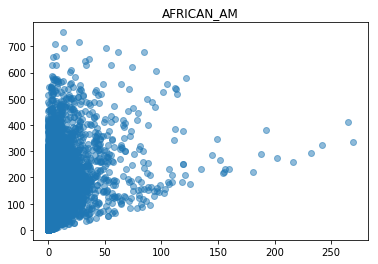

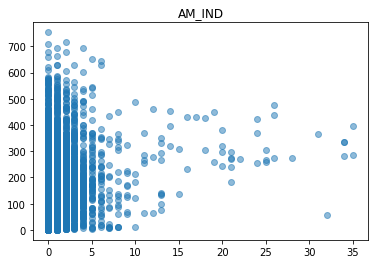

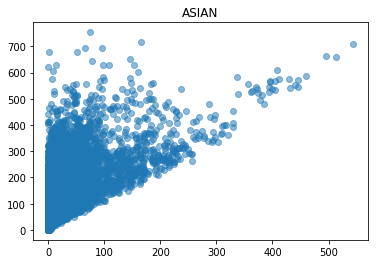

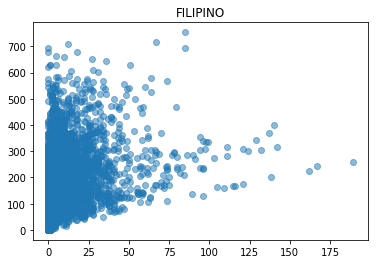

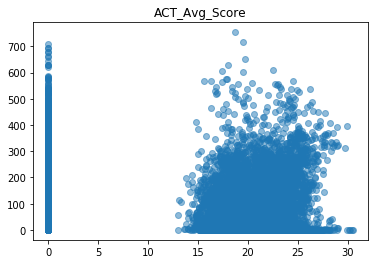

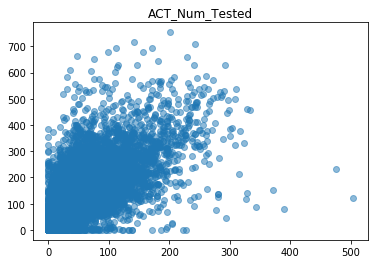

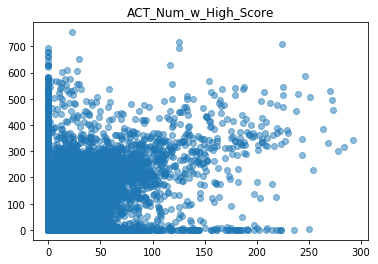

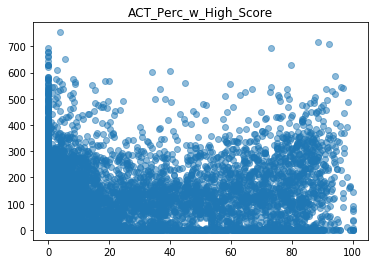

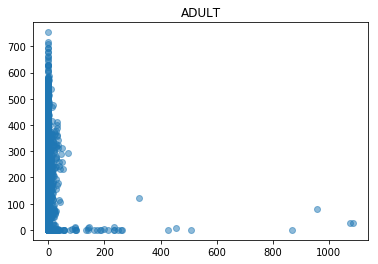

TypeError: 0 is not a string

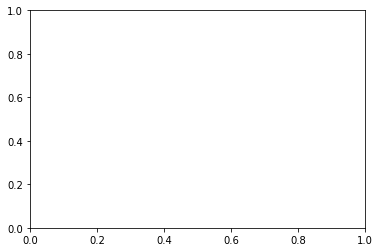

In [947]:
# for feature in X.columns:
#     plt.scatter(X[feature], y, alpha=.5)
#     plt.title(feature)
#     plt.show()

In [32]:
model_lasso = Lasso()
model_lasso.fit(X_train, y_train)
model_lasso.score(X_test,y_test), model_lasso.score(X_val,y_val)

(0.9991436837926901, 0.9989203062034355)

In [33]:
model_ridge = Ridge()
model_ridge.fit(X_train, y_train)
model_ridge.score(X_test,y_test), model_ridge.score(X_val,y_val)

(0.9992593320908322, 0.9990163417297929)

In [34]:
model_lin_reg = LinearRegression()
model_lin_reg.fit(X_train, y_train)
model_lin_reg.score(X_test,y_test), model_lin_reg.score(X_val,y_val)

(0.9992593312070315, 0.9990163420520738)

In [35]:
len(X.columns)

53

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

r_values = []
real_start = time.time()
for i in range(15, 106, 5):
    start = time.time()
    print('Running with ' + str(i) + ' trees')
    for k in range(15, 51, 5):
        rf = RandomForestClassifier(n_estimators=i,max_features=k, n_jobs=-2, random_state=37)
        rf = rf.fit(X_train, y_train)
        score = rf.score(X_test, y_test)
        val = rf.score(X_val, y_val)
        r_values.append({'trees':i, 'features':k, 'score':score, 'val':val, 'diff':(score-val)})

    end = time.time()
    print("time on job: " + str(round(end - start, 2)) + " seconds")
    start = time.time()
    
end = time.time()
print("Total time computing: " + str(round(end - real_start, 2)) + " seconds")
    
r_values = pd.DataFrame(r_values)
r_values.sort_values('diff', ascending=False).head()

Running with 15 trees
time on job: 47.22 seconds
Running with 20 trees
time on job: 63.33 seconds
Running with 25 trees
time on job: 78.72 seconds
Running with 30 trees
time on job: 90.77 seconds
Running with 35 trees
time on job: 106.96 seconds
Running with 40 trees
time on job: 122.97 seconds
Running with 45 trees
time on job: 136.16 seconds
Running with 50 trees
time on job: 149.43 seconds
Running with 55 trees
time on job: 164.91 seconds
Running with 60 trees
time on job: 177.25 seconds
Running with 65 trees
time on job: 193.78 seconds
Running with 70 trees
time on job: 208.31 seconds
Running with 75 trees
time on job: 221.38 seconds
Running with 80 trees
time on job: 236.11 seconds
Running with 85 trees
time on job: 251.89 seconds
Running with 90 trees
time on job: 266.24 seconds
Running with 95 trees
time on job: 278.95 seconds
Running with 100 trees
time on job: 294.9 seconds
Running with 105 trees
time on job: 308.46 seconds
Total time computing: 3397.74 seconds


,diff,features,score,trees,val
0,0.363686,15,0.999267,15,0.635581
16,0.362404,15,1.000000,25,0.637596
8,0.362221,15,0.999817,20,0.637596
24,0.361854,15,1.000000,30,0.638146
40,0.360938,15,1.000000,40,0.639062


In [47]:
r_values = pd.DataFrame(r_values)
r_values.loc[r_values['score']<1].sort_values('score', ascending=False).head()

,diff,features,score,trees,val
79,0.350495,50,0.999817,60,0.649322
52,0.349945,35,0.999817,45,0.649872
44,0.350678,35,0.999817,40,0.649139
33,0.357274,20,0.999817,35,0.642543
25,0.357274,20,0.999817,30,0.642543


In [48]:
r_values.loc[(r_values['score']>=.75)].sort_values(by='diff').head()

,diff,features,score,trees,val
70,0.348296,45,1.0,55,0.651704
78,0.348663,45,1.0,60,0.651337
127,0.348663,50,1.0,90,0.651337
60,0.348846,35,1.0,50,0.651154
142,0.348846,45,1.0,100,0.651154


In [49]:
best_rs = []

max_diff = .25
min_score = .75
        
try:
    for index, row in r_values.iterrows():
        if (row['diff'] < max_diff) & (row['score']> min_score):
            if row['score'] < 1:
                best_rs.append(row)

    r_df = pd.DataFrame(best_rs)
    r_df.sort_values(by='val', ascending=False, inplace=True)
    r_df.reset_index(drop=True, inplace=True)
    
    print('A total of ' + str(len(best_rs)) + ' models with '+ 
          str(min_score) + ' minimum r^2 value and ' + str(max_diff) + ' difference') 
    print('Model with the minimum difference is ' + 
          str(r_df.iloc[[0]]['trees'][0]), 
          str(r_df.iloc[[0]]['depth'][0]), 
          str(r_df.iloc[[0]]['features'][0]), 
          str(r_df.iloc[[0]]['score'][0]),
          str(r_df.iloc[[0]]['val'][0]))
    
    r_df['depth']=r_df['depth'].astype(int)
    r_df['features']=r_df['features'].astype(int)
    r_df['trees']=r_df['trees'].astype(int)
    r_df.head()
          
except:
    print("No models fit the parameters selected.  Try adjusting your requirements")
    


No models fit the parameters selected.  Try adjusting your requirements


In [1026]:
trees = r_df.iloc[[0]]['trees'][0]
depth = r_df.iloc[[0]]['depth'][0]
features = r_df.iloc[[0]]['features'][0]

rf = RandomForestClassifier(n_estimators=trees, max_depth=depth, max_features=features, n_jobs=-1, random_state=37)
rf = rf.fit(X_train, y_train)
score = rf.score(X_test, y_test)
val = rf.score(X_val, y_val)
print(score, val)

0.7795492028587135 0.5309637229754489


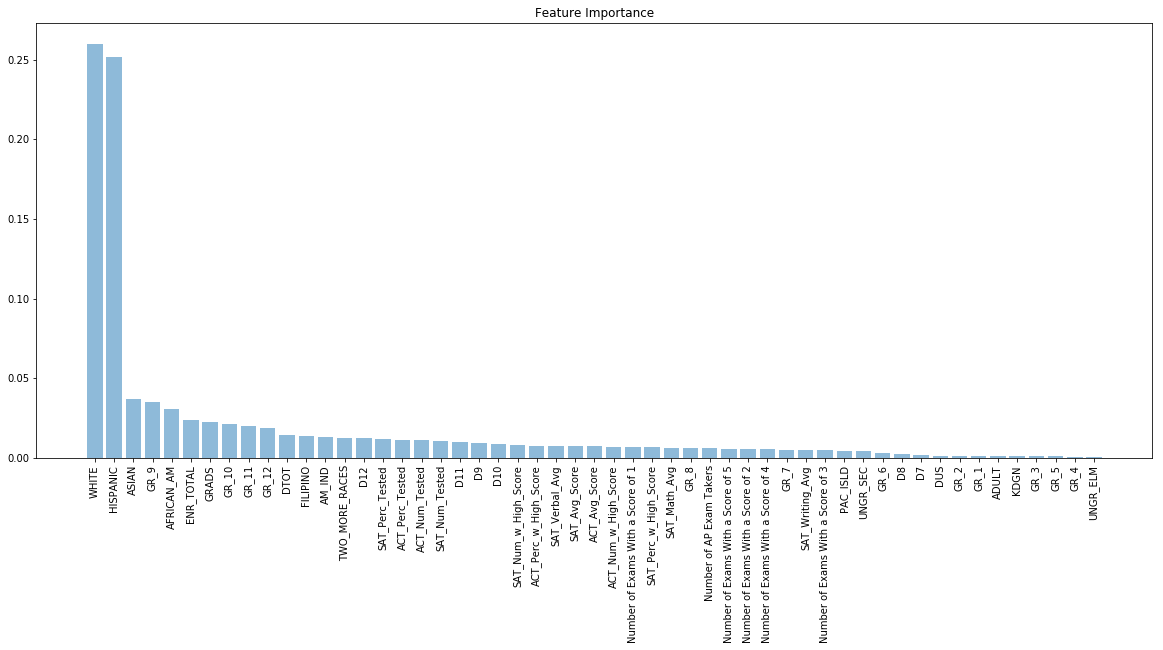

,importance,feature
0,0.259869,WHITE
1,0.251688,HISPANIC
2,0.036977,ASIAN
3,0.035334,GR_9
4,0.030707,AFRICAN_AM
5,0.023604,ENR_TOTAL
6,0.022502,GRADS
7,0.021331,GR_10
8,0.020221,GR_11
9,0.019128,GR_12


In [1027]:
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame(X.columns.tolist(), importances)
feature_importance_df.reset_index(inplace=True)
feature_importance_df.rename(columns={'index':'importance', 0:'feature'}, inplace=True)
feature_importance_df.sort_values(by='importance', ascending=False, inplace=True)
feature_importance_df.reset_index(drop=True, inplace=True)

plt.figure(figsize=(20, 8))
plt.bar(feature_importance_df['feature'], feature_importance_df['importance'], alpha=.5)
plt.xticks(rotation='vertical')
plt.title('Feature Importance')

plt.show()

feature_importance_df

k: 1, Train/Test Score: 1.000/1.000
k: 3, Train/Test Score: 0.438/0.442
k: 5, Train/Test Score: 0.344/0.348
k: 7, Train/Test Score: 0.313/0.317
k: 9, Train/Test Score: 0.297/0.301
k: 11, Train/Test Score: 0.287/0.291
k: 13, Train/Test Score: 0.283/0.286
k: 15, Train/Test Score: 0.277/0.281
k: 17, Train/Test Score: 0.274/0.280
k: 19, Train/Test Score: 0.270/0.276


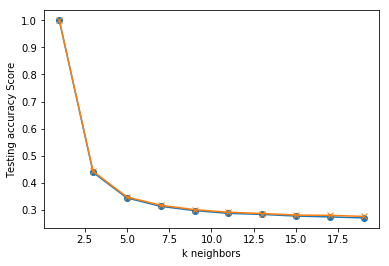

In [1028]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [750]:
#pickling our model
model=rf
pickle.dump(model, open('student_outcomes.model', 'wb'))

In [767]:
#pickling a sample
the_school = prediction_values.iloc[4]

pickle.dump(the_school, open('davis_high.school', 'wb'))

In [766]:
merged_concat_df.iloc[4]

ADULT                                    0
AFRICAN_AM                               4
AM_IND                                   6
ASIAN                                   38
Average\nMath\nScore                   506
CDS_CODE                    10621171031053
COUNTY                              Fresno
D7                                       0
DISTRICT                    Clovis Unified
ENR_TOTAL                             2604
FILIPINO                                 4
GRADS                                  696
GR_10                                  582
GR_11                                  623
GR_12                                  728
GR_8                                     0
GR_9                                   649
HISPANIC                                33
MULTIPLE                                 0
PAC_ISLD                                 3
SCHOOL                         Clovis High
TOTAL                                  296
UC_GRADS                               296
UNGR_ELM   

In [764]:
merged_concat_df.loc[merged_concat_df['Average\nTotal\nScore']>0]

,ADULT,AFRICAN_AM,AM_IND,ASIAN,Average Math Score,CDS_CODE,COUNTY,D7,DISTRICT,ENR_TOTAL,...,Grade 12 Enrollment_y,Number w/Score >=21,Number Tested,Number of Takers,Number w/Score >=1000,Percent Tested,Percent of Takers,Percent w/Score >=1000,Percent w/Score >=21,Writing Average
1,0,0,0,0,527.0,10621171030469,Fresno,0,Clovis Unified,133,...,40,73,0,1,154,16.4,2.5,24.8,11.8,0
3,0,0,0,0,523.0,10621171031004,Fresno,1,Clovis Unified,378,...,86,28,0,1,182,9.6,1.2,25.3,3.9,0
4,0,4,6,38,506.0,10621171031053,Fresno,0,Clovis Unified,2604,...,719,0,69,305,14,2.3,42.4,8.1,0,0
5,0,0,0,3,471.0,10621251031376,Fresno,0,Coalinga-Huron Unified,1017,...,172,0,4,31,9,7.9,18,7.9,0,0
7,0,12,1,27,465.0,10621661030279,Fresno,0,Fresno Unified,2504,...,591,0,146,342,4,0.4,57.9,1.7,0,0
8,0,1,0,22,514.0,10621661030295,Fresno,0,Fresno Unified,1006,...,202,50,24,46,100,31.0,22.8,31.9,16,0
9,0,17,0,62,409.0,10621661031897,Fresno,0,Fresno Unified,2186,...,313,7,97,177,23,6.8,56.5,4.7,1.4,0
10,0,6,0,28,457.0,10621661032507,Fresno,0,Fresno Unified,2825,...,486,14,33,119,52,10.5,24.5,12.7,3.4,0
11,0,17,3,33,411.0,10621661032911,Fresno,0,Fresno Unified,2454,...,409,8,43,168,12,17.6,41.1,2.7,1.8,0
12,0,4,0,56,420.0,10621661034214,Fresno,0,Fresno Unified,2305,...,449,19,79,109,36,11.7,24.3,6.4,3.4,0
